In [1]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import pandas as pd
# Some defaults:
plt.rcParams['figure.figsize'] = (16, 5)  # Default plot size
import sys
sys.path.append('../core/')
import data_download as dd

In [2]:
dd.download_pipeline()

../data/austria/data.zip
Database successfully downloaded.

Successfully unzipped and installed database.


In [3]:
df_bundesland = pd.read_csv(
    "../data/austria/CovidFaelle_Timeline.csv",
    sep=";",
    index_col=0,
    parse_dates=[0],
    infer_datetime_format=True,
    decimal=","
)
df_settlement = pd.read_csv(
    "../data/austria/CovidFaelle_Timeline_GKZ.csv",
    sep=";",
    index_col=0,
    parse_dates=[0],
    infer_datetime_format=True,
    decimal=","
)
df_fz = pd.read_csv(
    "../data/austria/CovidFallzahlen.csv",
    sep=";",
    index_col=0,
    parse_dates=[0],
    dayfirst=True,
    decimal=","
)

In [4]:
df_fz["PercentHospOcc"] = 100*df_fz["FZHosp"].div(df_fz["FZHosp"] + df_fz["FZHospFree"])
df_fz["PercentICUOcc"] = 100*df_fz["FZICU"].div(df_fz["FZICU"] + df_fz["FZICUFree"])
df_fz

,TestGesamt,MeldeDatum,FZHosp,FZICU,FZHospFree,FZICUFree,BundeslandID,Bundesland,PercentHospOcc,PercentICUOcc
Meldedat,,,,,,,,,,
2020-04-01,0,01.04.2020 00:00:00,7,3,12,3,1,Burgenland,36.842105,50.000000
2020-04-01,0,01.04.2020 00:00:00,18,11,1048,119,2,Kärnten,1.688555,8.461538
2020-04-01,9395,01.04.2020 00:00:00,164,36,3854,157,3,Niederösterreich,4.081633,18.652850
2020-04-01,0,01.04.2020 00:00:00,113,29,4408,116,4,Oberösterreich,2.499447,20.000000
2020-04-01,7439,01.04.2020 00:00:00,56,10,1267,85,5,Salzburg,4.232804,10.526316
...,...,...,...,...,...,...,...,...,...,...
2021-01-14,806091,14.01.2021 00:00:00,285,59,669,90,6,Steiermark,29.874214,39.597315
2021-01-14,843027,14.01.2021 00:00:00,117,26,120,26,7,Tirol,49.367089,50.000000
2021-01-14,455590,14.01.2021 00:00:00,56,15,146,28,8,Vorarlberg,27.722772,34.883721


In [5]:
df_oeste = df_bundesland[df_bundesland["BundeslandID"]==10]
df_tirol = df_bundesland[df_bundesland["Bundesland"]=="Tirol"]
df_innsbruck = df_settlement[df_settlement["Bezirk"]=="Innsbruck-Land"]
df_innsbruck_city = df_settlement[df_settlement["Bezirk"]=="Innsbruck-Stadt"]

In [6]:
df_tirol["AnzEinwohner"][-1]

757634

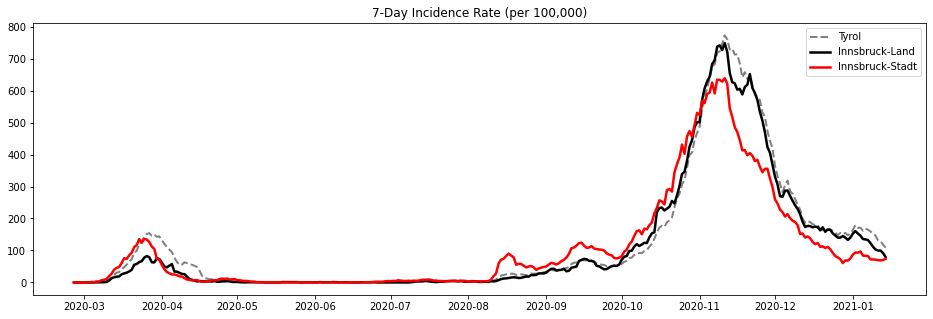

In [7]:
plt.plot(df_tirol["SiebenTageInzidenzFaelle"],
        label="Tyrol",
        color="gray",
        linestyle="dashed",
        linewidth=2)
plt.plot(df_innsbruck["SiebenTageInzidenzFaelle"],
        label="Innsbruck-Land",
        color="black",
        linewidth=2.5)
plt.plot(df_innsbruck_city["SiebenTageInzidenzFaelle"],
        label="Innsbruck-Stadt",
        color="red",
        linewidth=2.5)
plt.title("7-Day Incidence Rate (per 100,000)")
plt.legend()
plt.show()

In [8]:
df_fz_oeste = df_fz[df_fz["BundeslandID"]==10]
df_fz_tirol = df_fz[df_fz["Bundesland"]=="Tirol"]
df_fz_tirol[df_fz_tirol.index=="2021-01-07"]

,TestGesamt,MeldeDatum,FZHosp,FZICU,FZHospFree,FZICUFree,BundeslandID,Bundesland,PercentHospOcc,PercentICUOcc
Meldedat,,,,,,,,,,
2021-01-07,468213,07.01.2021 00:00:00,113,31,123,22,7,Tirol,47.881356,58.490566


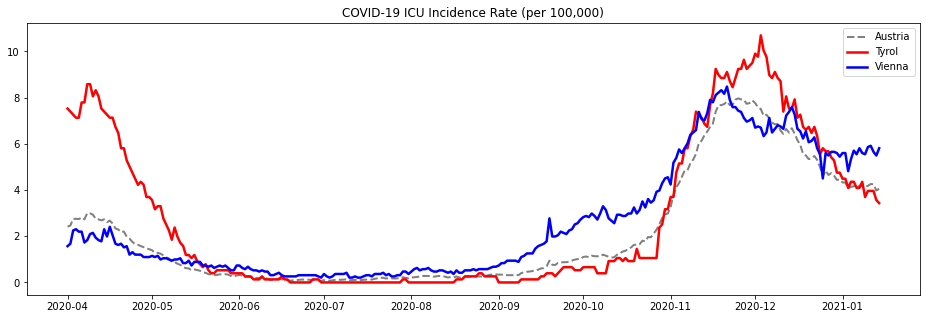

In [9]:
plt.plot(df_fz_oeste["FZICU"]/df_oeste["AnzEinwohner"]*100000,
        label="Austria",
        color="gray",
        linestyle="dashed",
        linewidth=2)
plt.plot(df_fz_tirol["FZICU"]/df_tirol["AnzEinwohner"]*100000,
        label="Tyrol",
        color="red",
        linewidth=2.5)

plt.plot(df_fz[df_fz["Bundesland"]=="Wien"]["FZICU"]
         /df_bundesland[df_bundesland["Bundesland"]=="Wien"]["AnzEinwohner"][-1]*100000,
        label="Vienna",
        color="blue",
        linewidth=2.5)
plt.title("COVID-19 ICU Incidence Rate (per 100,000)")
plt.legend()
plt.show()

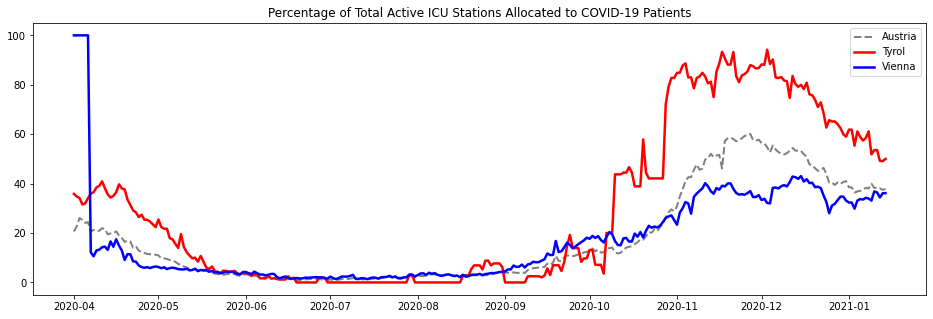

In [10]:
plt.plot(df_fz_oeste["PercentICUOcc"],
        label="Austria",
        color="gray",
        linestyle="dashed",
        linewidth=2)
plt.plot(df_fz_tirol["PercentICUOcc"],
        label="Tyrol",
        color="red",
        linewidth=2.5)

plt.plot(df_fz[df_fz["Bundesland"]=="Wien"]["PercentICUOcc"],
        label="Vienna",
        color="blue",
        linewidth=2.5)
plt.title("Percentage of Total Active ICU Stations Allocated to COVID-19 Patients")
plt.legend()
plt.show()